In [1]:
#import tensorflow terlebih dahulu
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop




In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import sklearn,os
from sklearn.model_selection import train_test_split

In [5]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-03-01 16:55:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.17MB/s    in 5m 21s  

2021-03-01 17:01:01 (982 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [6]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rock', 'paper', 'rps-cv-images', 'scissors']

In [7]:
!pip install split_folders

In [8]:
import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/data', seed=1337, ratio=(0.6,0.4))

Copying files: 2188 files [00:00, 3783.55 files/s]


In [9]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')

os.listdir('/tmp/rockpaperscissors/data/train')
os.listdir('/tmp/rockpaperscissors/data/val')

['rock', 'paper', 'scissors']

In [10]:
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images', 'paper')
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images','rock')
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images','scissors')


In [12]:
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir),test_size=0.4)
train_scissors_dir, val_rock_dir = train_test_split(os.listdir(scissors_dir),test_size=0.4)


In [13]:
tr_rock_dir = os.path.join(train_dir,'rock')
tr_paper_dir = os.path.join(train_dir,'paper')
tr_scissors_dir = os.path.join(train_dir,'scissors')

va_rock_dir = os.path.join(validation_dir,'rock')
va_paper_dir = os.path.join(validation_dir,'paper')
va_scissors_dir = os.path.join(validation_dir,'scissors')

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255, #rescale semua nilai pixel dari 0-255, setelah step ini pixel kita berubah menjadi antara (0,1)
    rotation_range=20,
    zoom_range=0.2, #untuk mengizinkan zoom 
    horizontal_flip=True, #gambar akan dibalik  horiztest_datagen = ImageDataGenerator(rescale=1./255)
    shear_range=0.2, #untuk mengizinkan transformasi secara acak
    fill_mode= 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255, #rescale semua nilai pixel dari 0-255, setelah step ini pixel kita berubah menjadi antara (0,1)
    rotation_range = 20,
    zoom_range=0.2, #untuk mengizinkan zoom 
    horizontal_flip=True, #gambar akan dibalik  horiztest_datagen = ImageDataGenerator(rescale=1./255)
    shear_range=0.2, #untuk mengizinkan transformasi secara acak
    fill_mode = 'nearest'
)

###TUTORIAL IMAGE CLASSIFIKASI : https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data train
    target_size=(150,150), ##mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32, #No. of images to be yielded from the generator per batch.\n",
    color_mode='rgb',
    class_mode='categorical', # Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”\n",
   )

val_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
   )


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [18]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [20]:
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs=20,
    validation_data = val_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 44s - loss: 1.2198 - accuracy: 0.4275 - val_loss: 0.9179 - val_accuracy: 0.6500
Epoch 2/20
25/25 - 44s - loss: 0.7629 - accuracy: 0.6862 - val_loss: 0.6297 - val_accuracy: 0.7188
Epoch 3/20
25/25 - 42s - loss: 0.4500 - accuracy: 0.8350 - val_loss: 0.5634 - val_accuracy: 0.7750
Epoch 4/20
25/25 - 41s - loss: 0.3783 - accuracy: 0.8662 - val_loss: 0.2856 - val_accuracy: 0.8938
Epoch 5/20
25/25 - 42s - loss: 0.2869 - accuracy: 0.8963 - val_loss: 0.2839 - val_accuracy: 0.9250
Epoch 6/20
25/25 - 42s - loss: 0.3167 - accuracy: 0.8725 - val_loss: 0.3938 - val_accuracy: 0.8438
Epoch 7/20
25/25 - 41s - loss: 0.2671 - accuracy: 0.8988 - val_loss: 0.3116 - val_accuracy: 0.8875
Epoch 8/20
25/25 - 43s - loss: 0.2254 - accuracy: 0.9237 - val_loss: 0.2119 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 42s - loss: 0.1617 - accuracy: 0.9425 - val_loss: 0.3759 - val_accuracy: 0.8813
Epoch 10/20
25/25 - 42s - loss: 0.2215 - accuracy: 0.9187 - val_loss: 0.2435 - val_accuracy: 0.8938
Epoch 11/

Saving WhatsApp Image 2021-03-01 at 23.39.53.jpeg to WhatsApp Image 2021-03-01 at 23.39.53.jpeg
WhatsApp Image 2021-03-01 at 23.39.53.jpeg
Ini adalah kertas


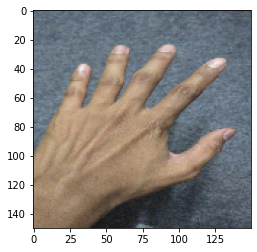

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for an in uploaded.keys():

  path = an
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images1 = np.vstack([x])
  classes1 = model.predict(images1, batch_size=10)

  print(an)

  if classes1[0][0] == 1 :
    print('Ini adalah kertas')

  elif classes1[0][1] == 1 :
    print('Ini adalah batu')
  
  else:
    print('Ini adalah gunting')